In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
train_df.shape

(42000, 785)

In [4]:
X_train = train_df.drop('label', axis=1)

In [5]:
X_train.shape

(42000, 784)

In [6]:
test_df.shape

(28000, 784)

In [7]:
y_train = train_df['label']

In [8]:
y_train.shape

(42000,)

In [9]:
del train_df

In [10]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [11]:
len(y_train)

42000

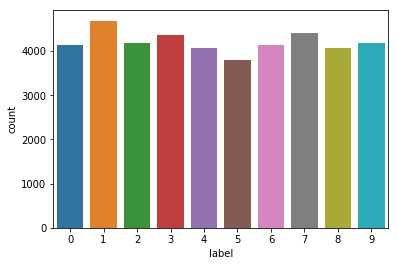

In [12]:
sns.countplot(y_train)

In [13]:
X_train = X_train.values.reshape(-1, 28,28,1)
test_df = test_df.values.reshape(-1,28,28,1)

In [14]:
X_train[0].shape

(28, 28, 1)

In [15]:
len(X_train)

42000

In [16]:
len(y_train)

42000

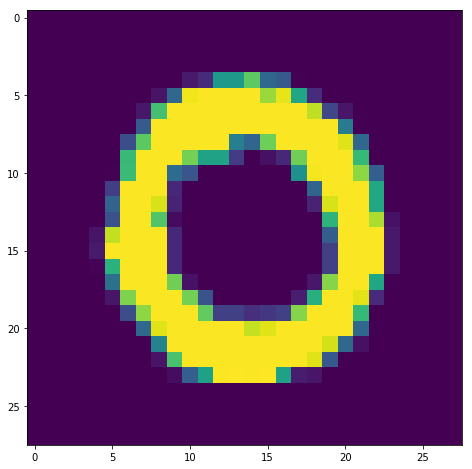

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(X_train[1][:,:,0])

In [18]:
X_train = X_train /255
test_df = test_df / 255


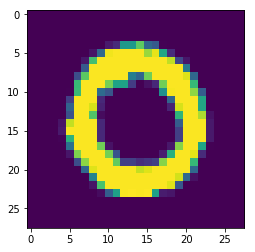

In [19]:
plt.imshow(X_train[1][:,:,0])

In [20]:
y_train = pd.get_dummies(y_train)

In [21]:
y_train.shape

(42000, 10)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=12)

In [24]:
x_train.shape

(33600, 28, 28, 1)

In [25]:
y_train.shape

(33600, 10)

In [26]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

Using TensorFlow backend.


In [27]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [28]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [29]:
batch_size=80
epochs = 3

In [30]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

In [31]:
history = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 2, steps_per_epoch=x_train.shape[0] // batch_size
                              )

Epoch 1/3


InvalidArgumentError:  logits and labels must have the same first dimension, got logits shape [80,10] and labels shape [800]
	 [[node loss/dense_2_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits (defined at C:\Program Files\Anaconda3\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]] [Op:__inference_keras_scratch_graph_2059]

Function call stack:
keras_scratch_graph


In [ ]:
# predict results
results = model.predict(test_df)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [ ]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("cnn_mnist_datagen.csv",index=False)